In [2]:
import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
from qiskit import Aer
from sklearn.decomposition import PCA
from tqdm.notebook import tqdm

import sys
sys.path.insert(0, '../../src/')
from neuralnetwork import *
from analysis import *
from utils import *

#%matplotlib notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
backend = Aer.get_backend('qasm_simulator')

# Trainability

## 1D, Constant Function

### Generate Data

In [4]:
n = 100
x = np.linspace(0, 1, n).reshape(-1,1)
y = 0.5*np.ones((n,1))

x = scaler(x, a=0, b=np.pi)

In [ ]:
plt.plot(x, y, 'o')
plt.show()

### Training Models

In [ ]:
np.random.seed(42)

qnn_list = []
for i in range(10):
    qnn = sequential_qnn(q_bits = [1, 4],
                         dim = [1, 4, 1],
                         reps = 1,
                         backend=backend,
                         shots=10000,
                         lr = 0.1)
    qnn.train(x, y, epochs=100, verbose=True)
    qnn_list.append(qnn)


In [ ]:
saver(qnn_list, data_path("trainability_qnn_1D_reps_1_constant"))

In [ ]:
np.random.seed(42)

qnn_list = []
for i in range(10):
    qnn = sequential_qnn(q_bits = [1, 4],
                         dim = [1, 4, 1],
                         reps = 2,
                         backend=backend,
                         shots=10000,
                         lr = 0.1)
    qnn.train(x, y, epochs=100)
    qnn_list.append(qnn)

saver(qnn_list, data_path("trainability_qnn_1D_reps_2_constant"))

In [ ]:
np.random.seed(42)

dnn_list = []
for i in range(10):
    dnn = sequential_dnn(dim = [1, 3, 1],
                         lr = 0.1)
    
    dnn.train(x, y, epochs=1000)
    dnn_list.append(dnn)

saver(dnn_list, data_path("trainability_dnn_1D_constant"))

## 1D, Gaussian Function

### Generate Data

In [5]:
n = 100
x = np.linspace(0, 1, n).reshape(-1,1)
y = gaussian(x, 0.5, 0.01)-gaussian(x, 0.2, 0.01) - gaussian(x, 0.8, 0.01) 

x = scaler(x, a=-np.pi/2, b=np.pi/2)
y = scaler(y, a=0.1, b=0.9)
print(y.shape)
x = np.hstack([x,x,x])

(100, 1)


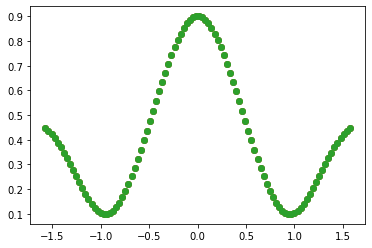

In [6]:
plt.plot(x, y, 'o')
plt.show()

### Training Models

In [ ]:
np.random.seed(42)

qnn_list = []
for i in range(10):
    qnn = sequential_qnn(q_bits = [1, 4],
                         dim = [1, 4, 1],
                         reps = 1,
                         backend=backend,
                         shots=10000,
                         lr = 0.1)
    qnn.train(x, y, epochs=100)
    qnn_list.append(qnn)

saver(qnn_list, data_path("trainability_qnn_1D_reps_1"))

In [ ]:
np.random.seed(42)

qnn_list = []
for i in range(10):
    qnn = sequential_qnn(q_bits = [1, 4],
                         dim = [1, 4, 1],
                         reps = 2,
                         backend=backend,
                         shots=10000,
                         lr = 0.1)
    qnn.train(x, y, epochs=100)
    qnn_list.append(qnn)

saver(qnn_list, data_path("trainability_qnn_1D_reps_2"))

In [ ]:
np.random.seed(42)
dnn_list = []
for i in range(10):
    dnn = sequential_dnn(dim = [1, 5, 1],
                         lr = 0.1)
    
    dnn.train(x, y, epochs=1000)
    dnn_list.append(dnn)

saver(dnn_list, data_path("trainability_dnn_1D"))

In [7]:
np.random.seed(42)
qnn2 = sequential_qnn(q_bits = [3],
                         dim = [3, 1],
                         reps = 2,
                         sampler = LastBit(),
                         backend=backend,
                         shots=10000,
                         lr = 0.1)

qnn2.train(x, y, epochs=20, verbose=True)

  0%|          | 0/20 [00:00<?, ?it/s]

epoch: 0, loss: 0.18725839760861981
epoch: 1, loss: 0.1851979126335648
epoch: 2, loss: 0.18320708914435177
epoch: 3, loss: 0.18274554676903818
epoch: 4, loss: 0.1825851664323548
epoch: 5, loss: 0.18295451263927354
epoch: 6, loss: 0.18309599017762979
epoch: 7, loss: 0.18349493070640682
epoch: 8, loss: 0.1836606708918757
epoch: 9, loss: 0.1832497961107286
epoch: 10, loss: 0.18321467963511484
epoch: 11, loss: 0.182521312010682
epoch: 12, loss: 0.1823286803348094
epoch: 13, loss: 0.18239299849872456
epoch: 14, loss: 0.18225170509363658
epoch: 15, loss: 0.18234380730330005
epoch: 16, loss: 0.18255652375469958
epoch: 17, loss: 0.18274557393471055
epoch: 18, loss: 0.18266912731939158
epoch: 19, loss: 0.182920406889022


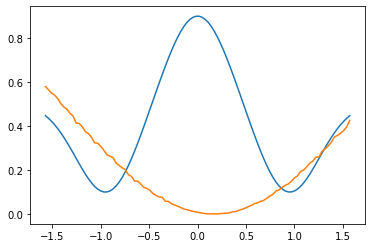

In [8]:
y_pred = qnn2.predict(x)
plt.plot(x[:,0], y)
plt.plot(x[:,0], y_pred)

## 2D function

### Generate Data

In [ ]:
np.random.seed(42)

n = 10
x = np.linspace(0, 1, n)
x = generate_meshgrid([x,x])

mean1 = np.array([[0.25, 0.75]])
var1 = np.array([[0.02, 0], [0, 0.02]])

mean2 = np.array([[0.75, 0.25]])
var2 = np.array([[0.02, 0], [0, 0.02]])

mean3 = np.array([[0.25, 0.25]])
var3 = np.array([[0.02, 0], [0, 0.02]])

mean4 = np.array([[0.75, 0.75]])
var4 = np.array([[0.02, 0], [0, 0.02]])

y = gaussian(x, mean1, var1) + gaussian(x, mean2, var2) - gaussian(x, mean3, var3) - gaussian(x, mean4, var4)


x_qnn = scaler(x, a=0, b=np.pi)
x_dnn = (x - np.mean(x, axis=0))/np.std(x, axis=0)
y = scaler(y, a=0, b=1)

In [ ]:
plt.imshow(y.reshape(n,n))
plt.show()

### Training Models

In [ ]:
np.random.seed(42)

qnn_list = []
for i in tqdm(range(10)):
    qnn = sequential_qnn(q_bits = [2, 4],
                         dim = [2, 4, 1],
                         reps = 1,
                         backend=backend,
                         shots=10000,
                         lr = 0.1)
    qnn.train(x, y, epochs=100)
    qnn_list.append(qnn)

saver(qnn_list, data_path("trainability_qnn_2D_reps_1"))

In [ ]:
np.random.seed(42)

qnn_list = []
for i in tqdm(range(10)):
    qnn = sequential_qnn(q_bits = [2, 4],
                         dim = [2, 4, 1],
                         reps = 2,
                         backend=backend,
                         shots=10000,
                         lr = 0.1)
    qnn.train(x, y, epochs=100)
    qnn_list.append(qnn)

saver(qnn_list, data_path("trainability_qnn_2D_reps_2"))

In [ ]:
np.random.seed(42)

qnn_list = []
for i in tqdm(range(10)):
    qnn = sequential_qnn(q_bits = [2, 4],
                         dim = [2, 4, 1],
                         reps = 3,
                         backend=backend,
                         shots=10000,
                         lr = 0.1)
    qnn.train(x, y, epochs=100)
    qnn_list.append(qnn)

saver(qnn_list, data_path("trainability_qnn_2D_reps_3"))

In [ ]:
np.random.seed(42)
dnn_list = []
for i in range(10):
    dnn = sequential_dnn(dim = [2, 6, 1],
                     lr = 0.1)
    
    dnn.train(x_dnn, y, epochs=5000)
    dnn_list.append(dnn)

saver(dnn_list, data_path("trainability_dnn_2D"))

## 3D function

### Constant Function

In [ ]:
np.random.seed(42)

n = 5
x = np.linspace(0, 1, n)
x = generate_meshgrid([x, x, x])
x = scaler(x, a=0, b=np.pi)

y = 0.5*np.ones((n**3, 1))

In [ ]:
np.random.seed(42)

qnn_list = []
for i in tqdm(range(1)):
    qnn = sequential_qnn(q_bits = [3, 4],
                         dim = [3, 4, 1],
                         reps = 1,
                         backend=backend,
                         shots=10000,
                         lr = 0.1)
    qnn.train(x, y, epochs=100, verbose=True)
    qnn_list.append(qnn)

saver(qnn_list, data_path("trainability_qnn_3D_constant_reps_1"))

### Generate Data

In [ ]:
np.random.seed(42)

n = 6
x = np.linspace(0, 1, n)
x = generate_meshgrid([x, x, x])

mean1 = np.array([[0.25, 0.25, 0.25]])
mean2 = np.array([[0.25, 0.25, 0.75]])
mean3 = np.array([[0.25, 0.75, 0.75]])
mean4 = np.array([[0.25, 0.75, 0.25]])

mean5 = np.array([[0.75, 0.25, 0.25]])
mean6 = np.array([[0.75, 0.25, 0.75]])
mean7 = np.array([[0.75, 0.75, 0.75]])
mean8 = np.array([[0.75, 0.75, 0.25]])

var = np.array([[0.02, 0, 0], [0, 0.02, 0], [0, 0, 0.02]])

y = gaussian(x, mean1, var) - gaussian(x, mean2, var) + gaussian(x, mean3, var) - gaussian(x, mean4, var) - gaussian(x, mean5, var) + gaussian(x, mean6, var) - gaussian(x, mean7, var) + gaussian(x, mean8, var)

x_qnn = scaler(x, a=0, b=np.pi)
x_dnn = (x - np.mean(x, axis=0))/np.std(x, axis=0)

y = scaler(y, a=0.1, b=0.9)

In [ ]:
plt.imshow(y.reshape(n,n,n)[0])
plt.show()

In [ ]:
np.random.seed(42)

qnn_list = []
for i in tqdm(range(10)):
    qnn = sequential_qnn(q_bits = [3],
                         dim = [3, 1],
                         reps = 5,
                         backend=backend,
                         shots=10000,
                         lr = 0.1)
    qnn.train(x, y, epochs=100, verbose=True)
    qnn_list.append(qnn)

saver(qnn_list, data_path("trainability_qnn_3D_single_circuit"))

In [ ]:
np.random.seed(42)

qnn_list = []
for i in tqdm(range(10)):
    qnn = sequential_qnn(q_bits = [3, 4],
                         dim = [3, 4, 1],
                         reps = 1,
                         backend=backend,
                         shots=10000,
                         lr = 0.1)
    qnn.train(x, y, epochs=100, verbose=True)
    qnn_list.append(qnn)

saver(qnn_list, data_path("trainability_qnn_3D_reps_1"))

In [ ]:
np.random.seed(42)

qnn_list = []
for i in tqdm(range(10)):
    qnn = sequential_qnn(q_bits = [3, 4],
                         dim = [3, 4, 1],
                         reps = 2,
                         backend=backend,
                         shots=10000,
                         lr = 0.1)
    qnn.train(x, y, epochs=100)
    qnn_list.append(qnn)

saver(qnn_list, data_path("trainability_qnn_3D_reps_2"))

In [ ]:
np.random.seed(42)

qnn_list = []
for i in range(10):
    qnn = sequential_qnn(q_bits = [3, 4],
                         dim = [3, 4, 1],
                         reps = 3,
                         backend=backend,
                         shots=10000,
                         lr = 0.1)
    qnn.train(x, y, epochs=100, verbose=True)
    qnn_list.append(qnn)

saver(qnn_list, data_path("trainability_qnn_3D_reps_3"))

In [ ]:
np.random.seed(42)
dnn_list = []
for i in range(10):
    dnn = sequential_dnn(dim = [3, 6, 1],
                     lr = 0.1)
    
    dnn.train(x_dnn, y, epochs=10000)
    dnn_list.append(dnn)

saver(dnn_list, data_path("trainability_dnn_3D"))

### Deep QKN

In [ ]:
np.random.seed(42)

n = 6
x = np.linspace(0, 1, n)
x = generate_meshgrid([x, x, x])

mean1 = np.array([[0.25, 0.25, 0.25]])
mean2 = np.array([[0.25, 0.25, 0.75]])
mean3 = np.array([[0.25, 0.75, 0.75]])
mean4 = np.array([[0.25, 0.75, 0.25]])

mean5 = np.array([[0.75, 0.25, 0.25]])
mean6 = np.array([[0.75, 0.25, 0.75]])
mean7 = np.array([[0.75, 0.75, 0.75]])
mean8 = np.array([[0.75, 0.75, 0.25]])

var = np.array([[0.02, 0, 0], [0, 0.02, 0], [0, 0, 0.02]])

y = gaussian(x, mean1, var) - gaussian(x, mean2, var) + gaussian(x, mean3, var) - gaussian(x, mean4, var) - gaussian(x, mean5, var) + gaussian(x, mean6, var) - gaussian(x, mean7, var) + gaussian(x, mean8, var)

x = scaler(x, a=0, b=np.pi)
y = scaler(y, a=0, b=1)

In [ ]:
plt.imshow(y.reshape(n,n,n)[0])
plt.show()

In [ ]:
np.random.seed(42)


qnn = sequential_qnn(q_bits = [3, 4, 4],
                     dim = [3, 4, 4, 1],
                     reps = 2,
                     backend=backend,
                     shots=10000,
                     lr = 0.1)

qnn.train(x, y, epochs=200, verbose=True)
    
saver(qnn, data_path("trainability_qnn_3D_deep"))

In [ ]:
x = scaler(x, mode="standard")

dnn = sequential_dnn(dim = [3, 6, 5, 1], lr = 0.1)

dnn.train(x, y, epochs=1000, verbose=True)

In [ ]:
plt.plot(qnn.loss)
plt.plot(dnn.loss)
plt.show()

### Hybrid Neural Network

In [ ]:
np.random.seed(42)

n = 6
x = np.linspace(0, 1, n)
x = generate_meshgrid([x, x, x])

mean1 = np.array([[0.25, 0.25, 0.25]])
mean2 = np.array([[0.25, 0.25, 0.75]])
mean3 = np.array([[0.25, 0.75, 0.75]])
mean4 = np.array([[0.25, 0.75, 0.25]])

mean5 = np.array([[0.75, 0.25, 0.25]])
mean6 = np.array([[0.75, 0.25, 0.75]])
mean7 = np.array([[0.75, 0.75, 0.75]])
mean8 = np.array([[0.75, 0.75, 0.25]])

var = np.array([[0.02, 0, 0], [0, 0.02, 0], [0, 0, 0.02]])

y = gaussian(x, mean1, var) - gaussian(x, mean2, var) + gaussian(x, mean3, var) - gaussian(x, mean4, var) - gaussian(x, mean5, var) + gaussian(x, mean6, var) - gaussian(x, mean7, var) + gaussian(x, mean8, var)

x = scaler(x, a=0, b=np.pi)
y = scaler(y, a=-2, b=2)

In [ ]:
np.random.seed(42)

layer1 = QLayer(n_qubits=3, n_features=3, n_targets=3, encoder=Encoder(), ansatz=Ansatz(), sampler=Parity(), reps=2, scale=1, backend=backend, shots=10000)
layer2 = Dense(n_features=3, n_targets=1, activation=Identity())
layers = [layer1, layer2]
network = NeuralNetwork(layers=layers, optimizer = Adam(lr=0.1))

In [ ]:
network.train(x, y, epochs=100, verbose=True)
saver(network, data_path("trainability_hybrid_2_layer"))

## Single Circuit

In [ ]:
n = 100
x = np.linspace(0, 1, n).reshape(-1,1)
y = gaussian(x, 0.3, 0.02) - gaussian(x, 0.7, 0.02) 

x = scaler(x, a=0, b=np.pi)
y = scaler(y, a=0.1, b=0.9)


In [ ]:
plt.plot(x,y)

In [ ]:
qnn = sequential_qnn(q_bits = [3],
                         dim = [3, 1],
                         reps = 3,
                         backend=backend,
                         shots=10000,
                         lr = 0.1)

In [ ]:
qnn.train(x, y, verbose=True)